## 1. Bike Sharing Analysis

In [1]:
# imports python libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#### Understanding the data


##### A good practice is to check the:
* size of the data we are loading
* the number of missing values of each column
* some general statistics about the numerical columns

In [4]:
# load hourly data
hourly_data = pd.read_csv('https://raw.githubusercontent.com/'\
'PacktWorkshops/'\
'The-Data-Analysis-Workshop/'\
'master/Chapter01/data/hour.csv')

In [5]:
hourly_data.head(10)

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   
5        6  2011-01-01       1   0     1   5        0        6           0   
6        7  2011-01-01       1   0     1   6        0        6           0   
7        8  2011-01-01       1   0     1   7        0        6           0   
8        9  2011-01-01       1   0     1   8        0        6           0   
9       10  2011-01-01       1   0     1   9        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81     0.0000       3          13   16  
1           1  0.22  0.2727  0.80     0.0000       8          32   40  
2           1  0.22  0.2727  0.80     0.0000       5          27   32  
3           1  0.24  0.2879  0.75     0.0000       3          10   13  
4           1  0.24  0.2879  0.75     0.0000       0           1    1  
5           2  0.24  0.2576  0.75     0.0896       0           1    1  
6           1  0.22  0.2727  0.80     0.0000       2           0    2  
7           1  0.20  0.2576  0.86     0.0000       1           2    3  
8           1  0.24  0.2879  0.75     0.0000       1           7    8  
9           1  0.32  0.3485  0.76     0.0000       8           6   14

In [8]:
# print some generic statistics about the data
print(f"Shape of data: {hourly_data.shape}")

Shape of data: (17379, 17)


In [10]:
# print some generic statistics about the data
print(f"Number of missing values in the data:\
{hourly_data.isnull().sum().sum()}")

Number of missing values in the data:0


In [12]:
# get statistics on the numerical columns
hourly_data.describe().T

count         mean          std   min        25%        50%  \
instant     17379.0  8690.000000  5017.029500  1.00  4345.5000  8690.0000   
season      17379.0     2.501640     1.106918  1.00     2.0000     3.0000   
yr          17379.0     0.502561     0.500008  0.00     0.0000     1.0000   
mnth        17379.0     6.537775     3.438776  1.00     4.0000     7.0000   
hr          17379.0    11.546752     6.914405  0.00     6.0000    12.0000   
holiday     17379.0     0.028770     0.167165  0.00     0.0000     0.0000   
weekday     17379.0     3.003683     2.005771  0.00     1.0000     3.0000   
workingday  17379.0     0.682721     0.465431  0.00     0.0000     1.0000   
weathersit  17379.0     1.425283     0.639357  1.00     1.0000     1.0000   
temp        17379.0     0.496987     0.192556  0.02     0.3400     0.5000   
atemp       17379.0     0.475775     0.171850  0.00     0.3333     0.4848   
hum         17379.0     0.627229     0.192930  0.00     0.4800     0.6300   
windspeed   17379.0     0.190098     0.122340  0.00     0.1045     0.1940   
casual      17379.0    35.676218    49.305030  0.00     4.0000    17.0000   
registered  17379.0   153.786869   151.357286  0.00    34.0000   115.0000   
cnt         17379.0   189.463088   181.387599  1.00    40.0000   142.0000   

                   75%         max  
instant     13034.5000  17379.0000  
season          3.0000      4.0000  
yr              1.0000      1.0000  
mnth           10.0000     12.0000  
hr             18.0000     23.0000  
holiday         0.0000      1.0000  
weekday         5.0000      6.0000  
workingday      1.0000      1.0000  
weathersit      2.0000      4.0000  
temp            0.6600      1.0000  
atemp           0.6212      1.0000  
hum             0.7800      1.0000  
windspeed       0.2537      0.8507  
casual         48.0000    367.0000  
registered    220.0000    886.0000  
cnt           281.0000    977.0000

#### Data Preprocessing

##### Exercise 1.01: Preprocessing Temporal and Weather Features 


In [16]:
# create a copy of the original data
preprocessed_data = hourly_data.copy()

In [18]:
# transform seasons
seasons_mapping = {1: 'winter', 2: 'spring', \
                   3: 'summer', 4: 'fall'}
preprocessed_data['season'] = preprocessed_data['season']\
.apply(lambda x: seasons_mapping[x])

In [20]:
# transform yr
yr_mapping = {0: 2011, 1: 2012}
preprocessed_data['yr'] = preprocessed_data['yr']\
.apply(lambda x: yr_mapping[x])

In [22]:
# transform weekday
weekday_mapping = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', \
                   3: 'Wednesday', 4: 'Thursday', 5: 'Friday', \
                   6: 'Saturday'}
preprocessed_data['weekday'] = preprocessed_data['weekday']\
.apply(lambda x: weekday_mapping[x])

In [24]:
# transform weathersit
weather_mapping = {1: 'clear', 2: 'cloudy', \
                   3: 'light_rain_snow', 4: 'heavy_rain_snow'}
preprocessed_data['weathersit'] = preprocessed_data['weathersit']\
.apply(lambda x: weather_mapping[x])

In [26]:
# transform hum and windspeed
preprocessed_data['hum'] = preprocessed_data['hum']*100
preprocessed_data['windspeed'] = preprocessed_data['windspeed']\
*67

In [28]:
# visualize preprocessed columns
cols = ['season', 'yr', 'weekday', \
        'weathersit', 'hum', 'windspeed']
preprocessed_data[cols].sample(10, random_state=123)

season    yr    weekday       weathersit   hum  windspeed
5792   summer  2011   Saturday            clear  74.0     8.9981
7823     fall  2011     Sunday            clear  43.0    31.0009
15426    fall  2012    Tuesday           cloudy  77.0     6.0032
15028    fall  2012     Sunday            clear  51.0    22.0028
12290  spring  2012     Friday           cloudy  89.0    12.9980
3262   spring  2011     Friday            clear  64.0     7.0015
10763  spring  2012   Thursday            clear  42.0    23.9994
12384  spring  2012    Tuesday  light_rain_snow  82.0    11.0014
6051   summer  2011  Wednesday            clear  52.0    19.0012
948    winter  2011   Saturday            clear  80.0     0.0000

In [30]:
"""
assert that total number of rides is equal to the sum of registered and casual ones
"""
assert (preprocessed_data.casual \
        + preprocessed_data.registered \
        == preprocessed_data.cnt).all(), \
'Sum of casual and registered rides not equal '\
'to total number of rides'

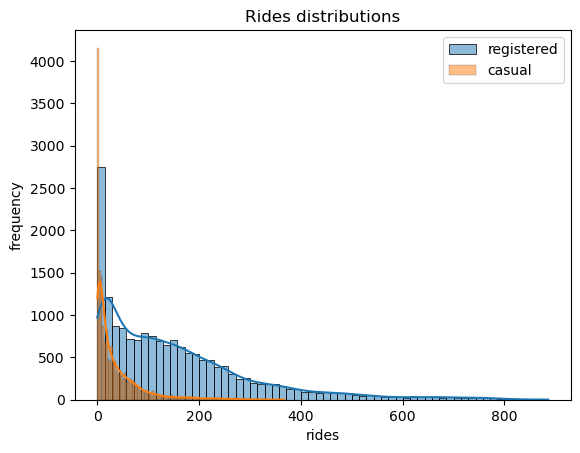

In [32]:
# plot distributions of registered vs casual rides
sns.histplot(preprocessed_data['registered'], label='registered', kde=True)
sns.histplot(preprocessed_data['casual'], label='casual', kde=True)
plt.legend()
plt.xlabel('rides')
plt.ylabel('frequency')
plt.title("Rides distributions")

plt.show()

##### Evolution of the number of rides per day for registered and casual customers


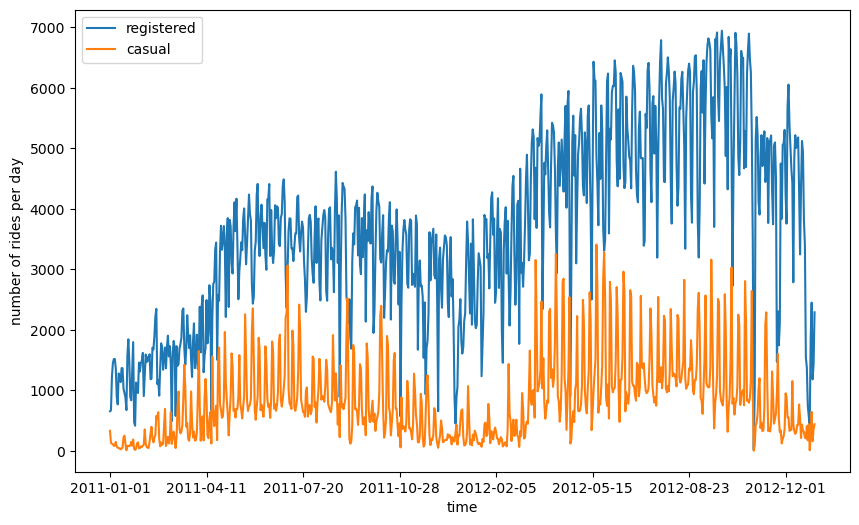

In [35]:
# plot evolution of rides over time
plot_data = preprocessed_data[['registered', 'casual', 'dteday']]
ax = plot_data.groupby('dteday').sum().plot(figsize=(10,6))
ax.set_xlabel("time");
ax.set_ylabel("number of rides per day");
plt.show()

In [37]:
"""
Create new dataframe with necessary for plotting columns, and obtain number of rides per day, by grouping over each day
"""
plot_data = preprocessed_data[['registered', 'casual', 'dteday']]
plot_data = plot_data.groupby('dteday').sum()
"""
define window for computing the rolling mean and standard deviation
"""
window = 7
rolling_means = plot_data.rolling(window).mean()
rolling_deviations = plot_data.rolling(window).std()

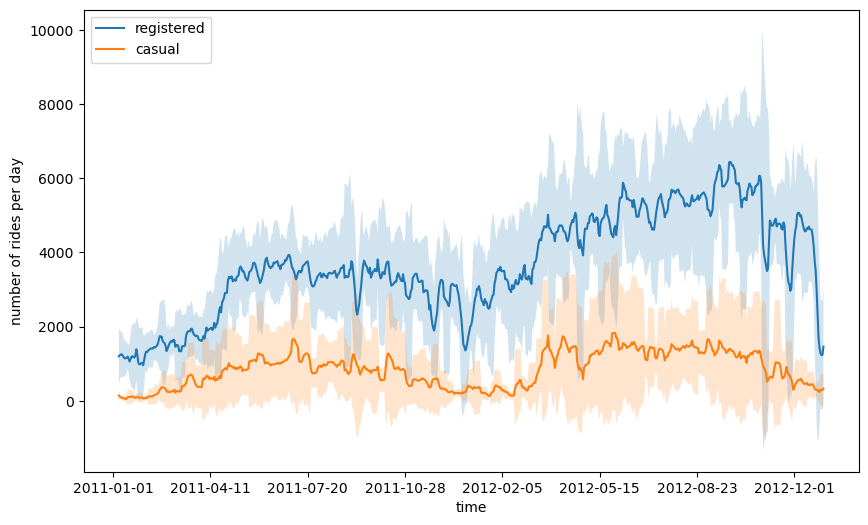

In [39]:
"""
Create a plot of the series, where we first plot the series of rolling means, then we color the zone between the series of rolling means +- 2 rolling standard deviations
"""
ax = rolling_means.plot(figsize=(10, 6))
ax.fill_between(rolling_means.index, rolling_means['registered'] \
                + 2*rolling_deviations['registered'], \
                rolling_means['registered'] \
                - 2*rolling_deviations['registered'], \
                alpha = 0.2)
ax.fill_between(rolling_means.index, rolling_means['casual'] \
                + 2*rolling_deviations['casual'], \
                rolling_means['casual'] \
                - 2*rolling_deviations['casual'], \
                alpha = 0.2)
ax.set_xlabel("time");
ax.set_ylabel("number of rides per day");
plt.show()

##### Distributions of the requests over separate hours and days of the week

C:\Users\Keny\anaconda3\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


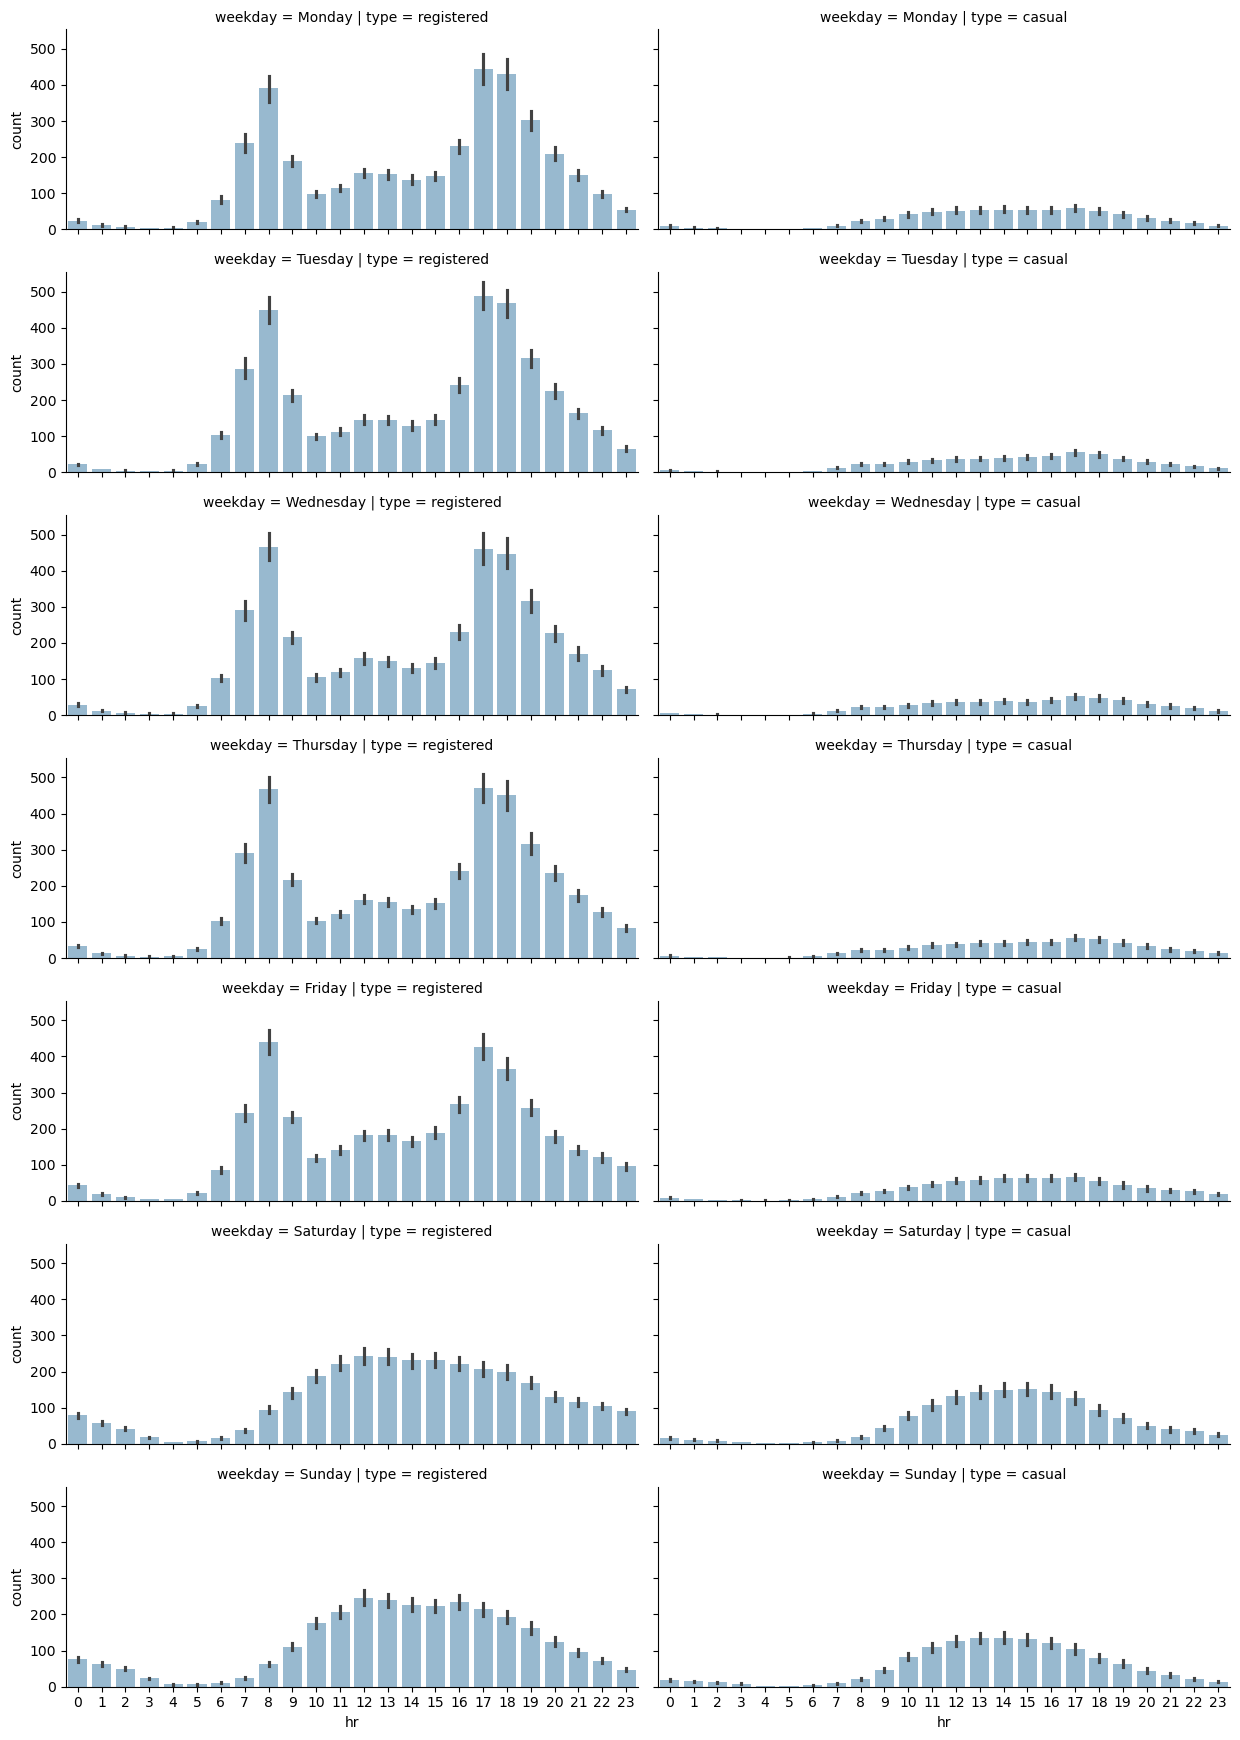

In [42]:
# select relevant columns
plot_data = preprocessed_data[['hr', 'weekday', 'registered', 'casual']]

# transform the data into a format, in number of entries are computed as count,
# for each distinct hr, weekday and type (registered or casual)
plot_data = plot_data.melt(id_vars=['hr', 'weekday'], var_name='type', value_name='count')

# create FacetGrid object, in which a grid plot is produced. 
# As columns, we have the various days of the week,
# as rows, the different types (registered and casual)
grid = sns.FacetGrid(plot_data, row='weekday', col='type', height=2.5,\
                     aspect=2.5, row_order=['Monday', 'Tuesday', \
                                            'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# populate the FacetGrid with the specific plots
grid.map(sns.barplot, 'hr', 'count', alpha=0.5)

plt.show()

##### Exercise 1.02: Analyzing Seasonal Impact on Rides


C:\Users\Keny\anaconda3\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


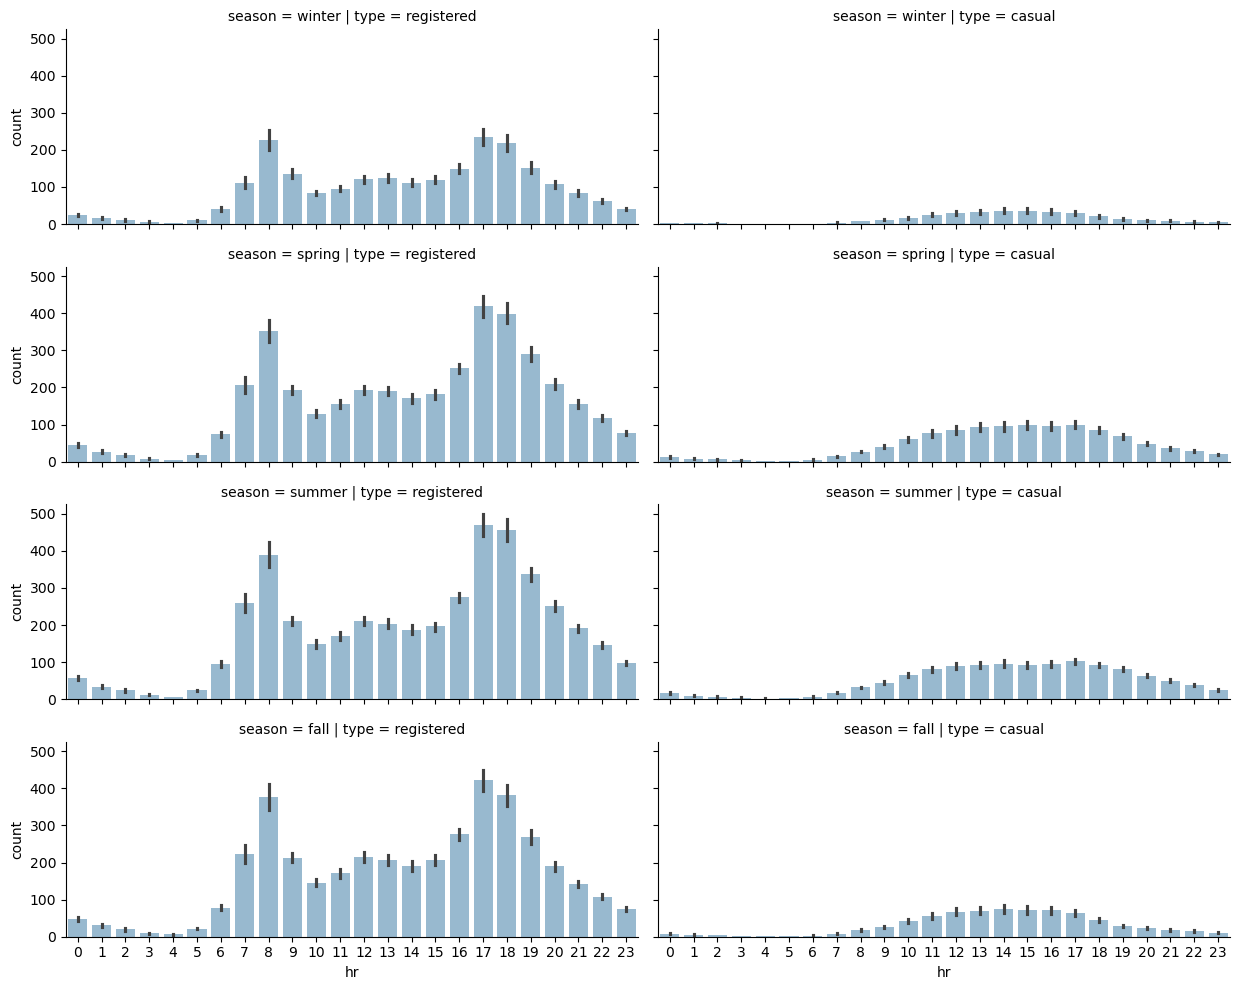

In [44]:
# select subset of the data
plot_data = preprocessed_data[['hr', 'season', \
                               'registered', 'casual']]

# unpivot data from wide to long format
plot_data = plot_data.melt(id_vars=['hr', 'season'], \
                           var_name='type', value_name='count')

# define FacetGrid
grid = sns.FacetGrid(plot_data, row='season', \
                     col='type', height=2.5, \
                     aspect=2.5, \
                     row_order=['winter', 'spring', \
                                'summer', 'fall'])

# apply plotting function to each element in the grid
grid.map(sns.barplot, 'hr', 'count', alpha=0.5)

plt.show()


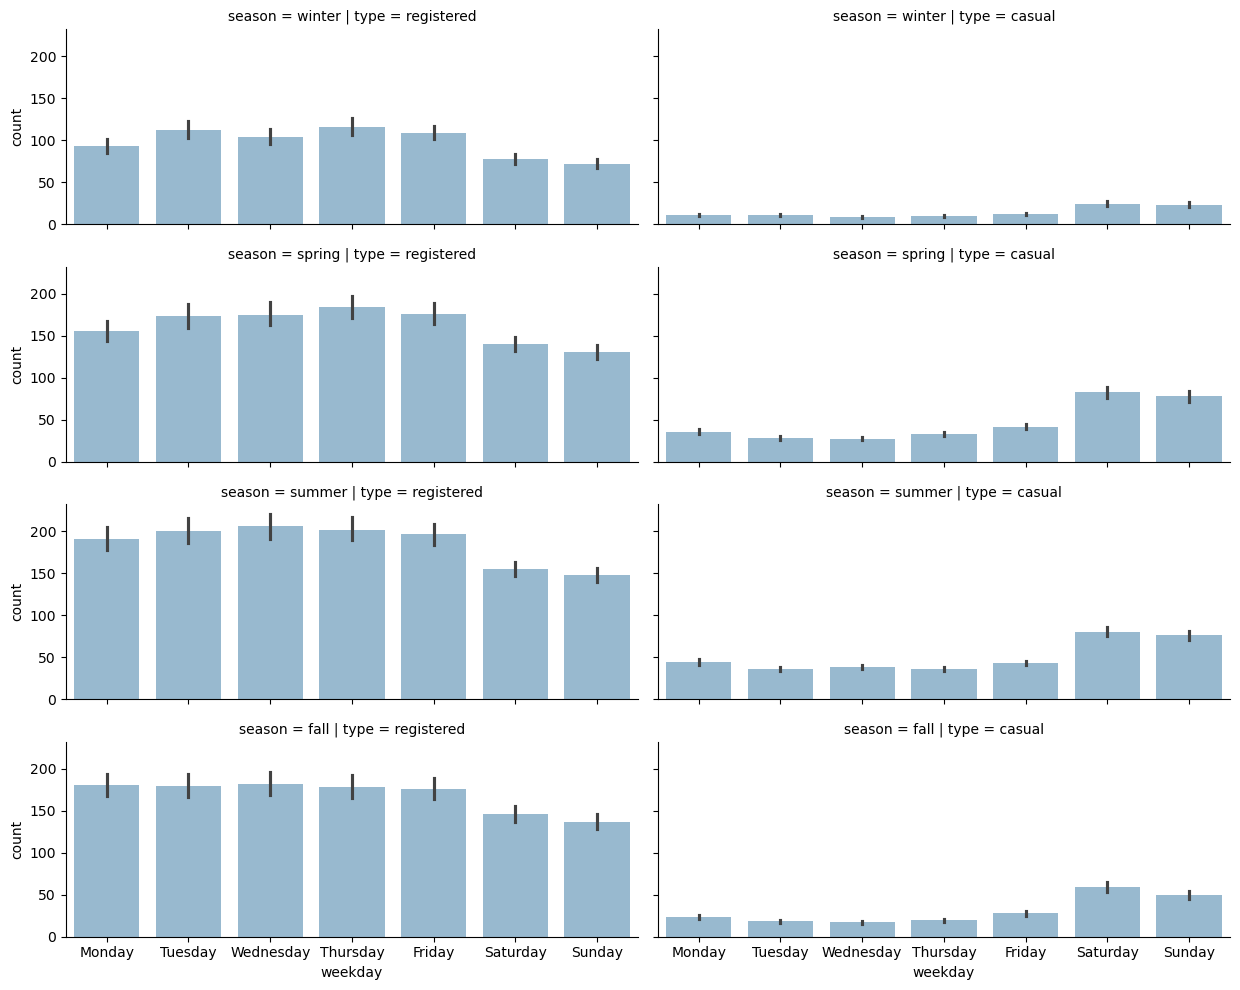

In [45]:
# Note that we are also specifying the order of the days of the week, which is passed as a parameter to the seaborn.barplot()

plot_data = preprocessed_data[['weekday', 'season', 'registered', 'casual']]
plot_data = plot_data.melt(id_vars=['weekday', 'season'], var_name='type', value_name='count')

grid = sns.FacetGrid(plot_data, row='season', col='type', height=2.5, aspect=2.5, 
                     row_order=['winter', 'spring', 'summer', 'fall'])
grid.map(sns.barplot, 'weekday', 'count', alpha=0.5, 
         order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.show()

### Hypothesis Tests

##### Exercise 1.03: Estimating Average Registered Rides

if the p-value obtained by the statistical test is less than 0.05(if p_value < α), you can reject the null hypothesis by at least 95%

if the p-value obtained by the statistical test is greater than 0.05(if p_value > α), you can fail to reject the null hypothesis by at least 95%

In [51]:
# compute population mean of registered rides
population_mean = preprocessed_data.registered.mean()

In [53]:
# get sample of the data (summer 2011)
sample = preprocessed_data[(preprocessed_data.season \
                            == "summer") \
& (preprocessed_data.yr \
   == 2011)].registered

In [55]:
# perform t-test and compute p-value. Reject the null hypothesis
from scipy.stats import ttest_1samp
test_result = ttest_1samp(sample, population_mean)
print(f"Test statistic: {test_result[0]}, \
p-value: {test_result[1]}")

Test statistic: -3.4919691483786197, p-value: 0.0004887645279519505


In [57]:
# get sample as 5% of the full data
import random
random.seed(111)
sample_unbiased = preprocessed_data.registered.sample(frac=0.05)
test_result_unbiased = ttest_1samp(sample_unbiased, \
                                   population_mean)
print(f"Unbiased test statistic: {test_result_unbiased[0]}, \
p-value: {test_result_unbiased[1]}")

Unbiased test statistic: 0.8790893162434852, p-value: 0.379596142154626


##### Exercise 1.04: Hypothesis Testing on Registered Rides

Practical example of how to perform a statistical test between two different groups

you are interested in identifying whether there is a statistically significant difference between registered rides during working days and the weekend. 

Statistic value: -16.004, p-value: 0.000


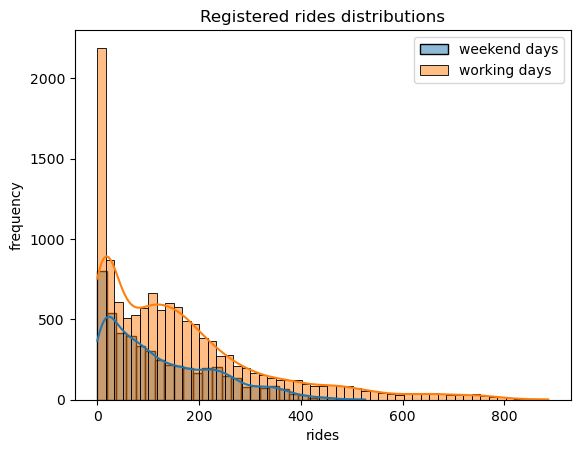

In [60]:
# define mask, indicating if the day is weekend or work day
weekend_days = ['Saturday', 'Sunday']
weekend_mask = preprocessed_data.weekday.isin(weekend_days)
workingdays_mask = ~preprocessed_data.weekday.isin(weekend_days)

# select registered rides for the weekend and working days
weekend_data = preprocessed_data.registered[weekend_mask]
workingdays_data = preprocessed_data.registered[workingdays_mask]

# perform ttest
from scipy.stats import ttest_ind
test_res = ttest_ind(weekend_data, workingdays_data)
print(f"Statistic value: {test_res[0]:.03f}, p-value: {test_res[1]:.03f}")

# plot distributions of registered rides for working vs weekend days
sns.histplot(weekend_data, label='weekend days', kde=True)
sns.histplot(workingdays_data, label='working days', kde=True)
plt.legend()
plt.xlabel('rides')
plt.ylabel('frequency')
plt.title("Registered rides distributions")

plt.show()

In [62]:
# select casual rides for the weekend and working days
weekend_data = preprocessed_data.casual[weekend_mask]
workingdays_data = preprocessed_data.casual[workingdays_mask]
# perform ttest
test_res = ttest_ind(weekend_data, workingdays_data)
print(f"Statistic value: {test_res[0]:.03f}, \
p-value: {test_res[1]:.03f}")

Statistic value: 41.077, p-value: 0.000


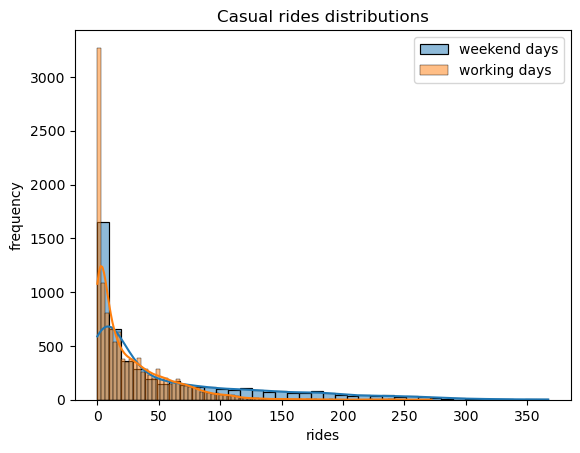

In [64]:
# plot distributions of casual rides for working vs weekend days
sns.histplot(weekend_data, label='weekend days', kde=True)
sns.histplot(workingdays_data, label='working days', kde=True)
plt.legend()
plt.xlabel('rides')
plt.ylabel('frequency')
plt.title("Casual rides distributions")
plt.show()

##### Analysis of Weather-Related Features

Correlation(also known as Pearson's correlation) is a statistic that measures the degree to which two random variables move in relation to each other. 

In [67]:
def plot_correlations(data, col):
    # get correlation between col and registered rides
    corr_r = np.corrcoef(data[col], data["registered"])[0,1]
    ax = sns.regplot(x=col, y="registered", data=data, scatter_kws={"alpha":0.05}, 
                     label=f"Registered rides (correlation: {corr_r:.3f})")
    
    # get correlation between col and casual rides
    corr_c = np.corrcoef(data[col], data["casual"])[0,1]
    ax = sns.regplot(x=col, y='casual', data=data, scatter_kws={"alpha":0.05}, 
                    label=f"Casual rides (correlation: {corr_c:.3f})")

    
# Create legend
    legend = ax.legend()

# Adjust alpha of each legend handle
    for lh in legend.legend_handles:
        lh.set_alpha(0.5)

    ax.set_ylabel("rides")
    ax.set_title(f"Correlation between rides and {col}")
    return ax

Applying the previously defined function to the four columns (temp, atemp, hum, and windspeed) returns the following figure:

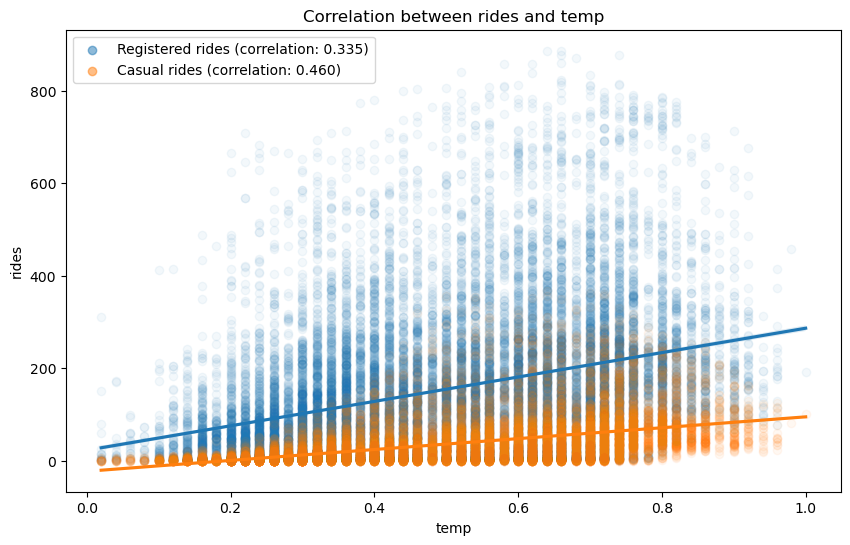

In [70]:
plt.figure(figsize=(10,6))
ax = plot_correlations(preprocessed_data, 'temp')
plt.show()

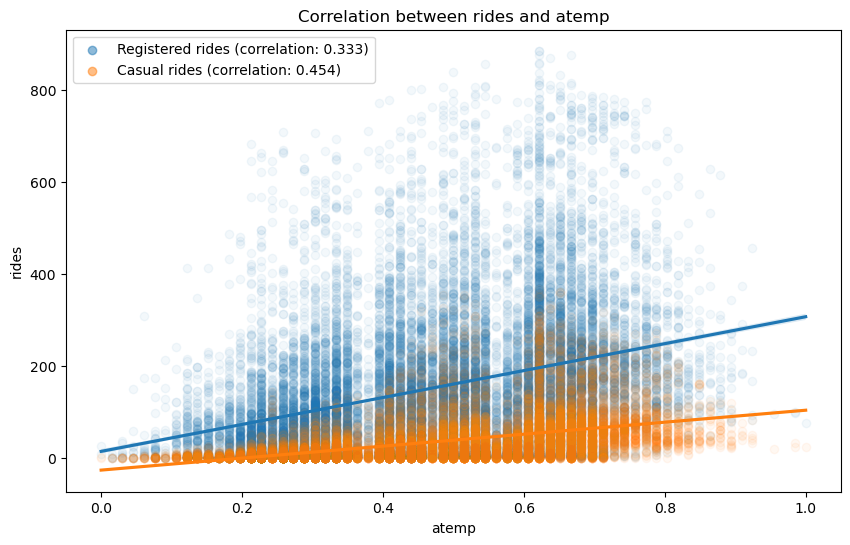

In [71]:
plt.figure(figsize=(10,6))
ax = plot_correlations(preprocessed_data, 'atemp')
plt.show()

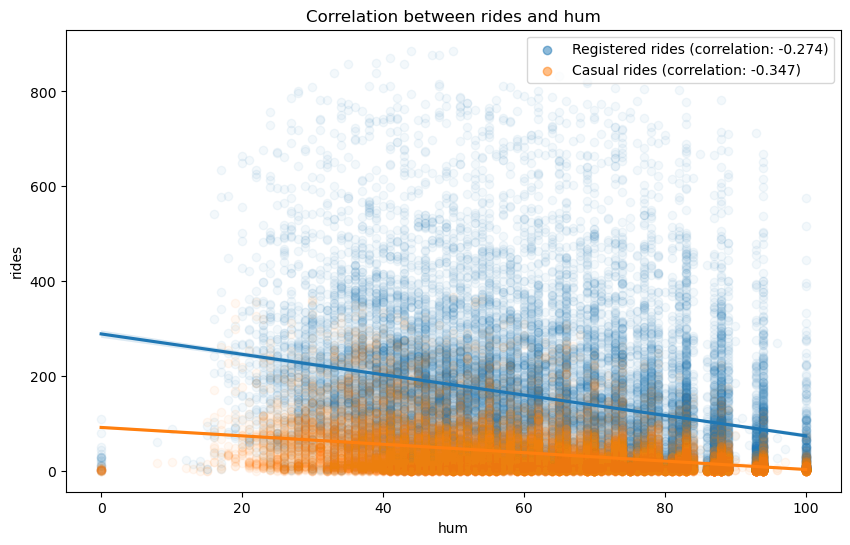

In [72]:
plt.figure(figsize=(10,6))
ax = plot_correlations(preprocessed_data, 'hum')
plt.show()

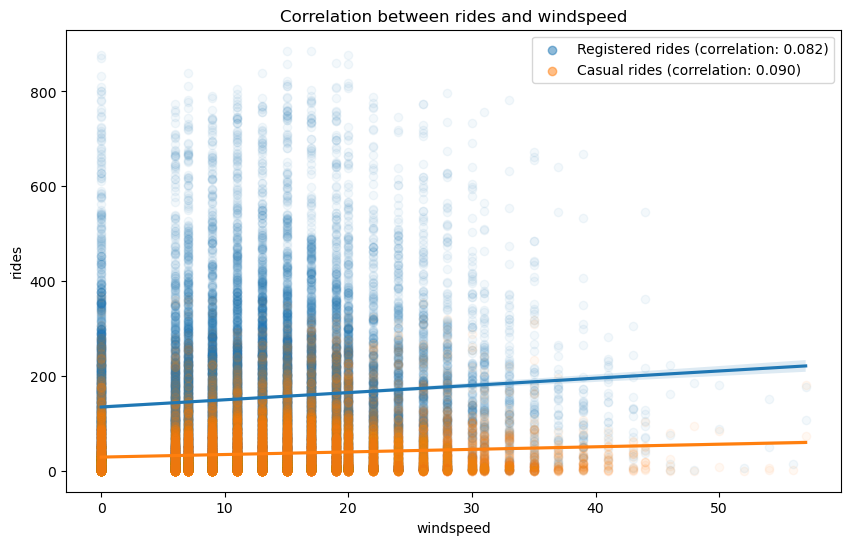

In [73]:
plt.figure(figsize=(10,6))
ax = plot_correlations(preprocessed_data, 'windspeed')
plt.show()

##### Exercise 1.05: Evaluating the Difference between the Pearson and Spearman Correlations


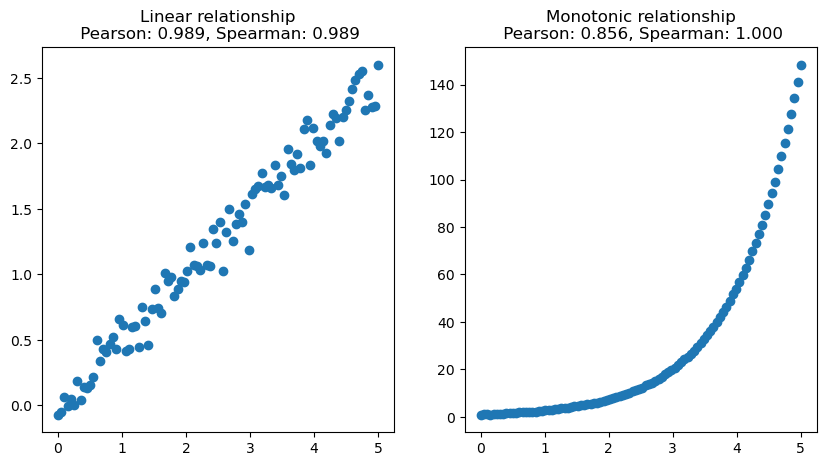

In [75]:
from scipy.stats import pearsonr, spearmanr

# define random variables
x = np.linspace(0,5, 100)
y_lin = 0.5*x + 0.1*np.random.randn(100)
y_mon = np.exp(x) + 0.1*np.random.randn(100)

# compute correlations
corr_lin_pearson = pearsonr(x, y_lin)[0]
corr_lin_spearman = spearmanr(x, y_lin)[0]
corr_mon_pearson = pearsonr(x, y_mon)[0]
corr_mon_spearman = spearmanr(x, y_mon)[0]

# visualize variables
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.scatter(x, y_lin)
ax1.set_title(f"Linear relationship\n Pearson: {corr_lin_pearson:.3f}, Spearman: {corr_lin_spearman:.3f}")
ax2.scatter(x, y_mon)
ax2.set_title(f"Monotonic relationship\n Pearson: {corr_mon_pearson:.3f}, Spearman: {corr_mon_spearman:.3f}")

plt.show()

In [77]:
# define function for computing correlations
def compute_correlations(data, col):
    pearson_reg = pearsonr(data[col], data["registered"])[0]
    pearson_cas = pearsonr(data[col], data["casual"])[0]
    spearman_reg = spearmanr(data[col], data["registered"])[0]
    spearman_cas = spearmanr(data[col], data["casual"])[0]
    return pd.Series({"Pearson (registered)": pearson_reg,\
                      "Spearman (registered)": spearman_reg,\
                      "Pearson (casual)": pearson_cas,\
                      "Spearman (casual)": spearman_cas})


In [78]:
# compute correlation measures between different features
cols = ["temp", "atemp", "hum", "windspeed"]
corr_data = pd.DataFrame(index=["Pearson (registered)", \
                                "Spearman (registered)",\
                                "Pearson (casual)",\
                                "Spearman (casual)"])
for col in cols:
    corr_data[col]=compute_correlations(preprocessed_data, col)
corr_data.T


Pearson (registered)  Spearman (registered)  Pearson (casual)  \
temp                   0.335361               0.373196          0.459616   
atemp                  0.332559               0.373014          0.454080   
hum                   -0.273933              -0.338480         -0.347028   
windspeed              0.082321               0.122936          0.090287   

           Spearman (casual)  
temp                0.570989  
atemp               0.570419  
hum                -0.388213  
windspeed           0.122920

##### Correlation Matrix Plot


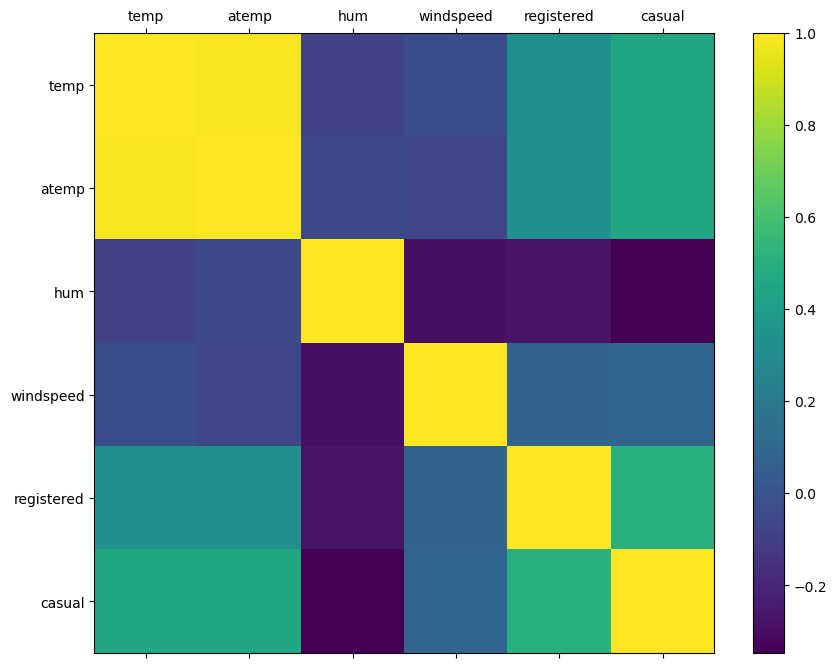

In [80]:
# plot correlation matrix
cols = ["temp", "atemp", "hum", "windspeed", \
        "registered", "casual"]
plot_data = preprocessed_data[cols]
corr = plot_data.corr()

fig = plt.figure(figsize=(10,8))
plt.matshow(corr, fignum=fig.number)
plt.xticks(range(len(plot_data.columns)), plot_data.columns)
plt.yticks(range(len(plot_data.columns)), plot_data.columns)
plt.colorbar()
plt.ylim([5.5, -0.5])


plt.show()

##### Time Series Analysis

A time series is a sequence of observations equally spaced in time and in chronological order. When studying time series, an important concept is the notion of stationarity. A time series is said to be **strongly stationary** if all aspects of its behavior do not change in time. In order to check stationarity in practice, we can rely on two different techniques for identifying time series stationarity: **rolling statistics**  and **augmented Dickey-Fuller stationarity test** 

* Rolling statisticsis a practical method in which we plot the rolling mean and standard deviation of a time series and visually identify whether those values fluctuate around a constant one, without large deviations. We have to inform the reader that this is more a rule-of-thumb approach and not a rigorous statistical test for stationarity.

* Augmented Dickey-Fuller stationarity test is a statistical test in which the null hypothesis is that the time series is nonstationary. Hence, when performing the test, a small p-value would be strong evidence against the time series being nonstationary.

In [82]:
# get daily rides
daily_rides = preprocessed_data[["dteday", "registered", "casual"]]
daily_rides = daily_rides.groupby("dteday").sum()

# convert index to DateTime object
daily_rides.index = pd.to_datetime(daily_rides.index)

In [91]:
# define function for plotting rolling statistics and ADF test for time series
from statsmodels.tsa.stattools import adfuller

def test_stationarity(ts, window=10, **kwargs):
    # create dataframe for plotting
    plot_data = pd.DataFrame(ts)
    plot_data['rolling_mean'] = ts.rolling(window).mean()
    plot_data['rolling_std'] = ts.rolling(window).std()

    # compute p-value of Dickey-Fuller test
    p_val = adfuller(ts)[1]

    ax = plot_data.plot(**kwargs)
    ax.set_title(f"Dickey-Fuller p-value: {p_val:.3f}")

<Figure size 640x480 with 0 Axes>

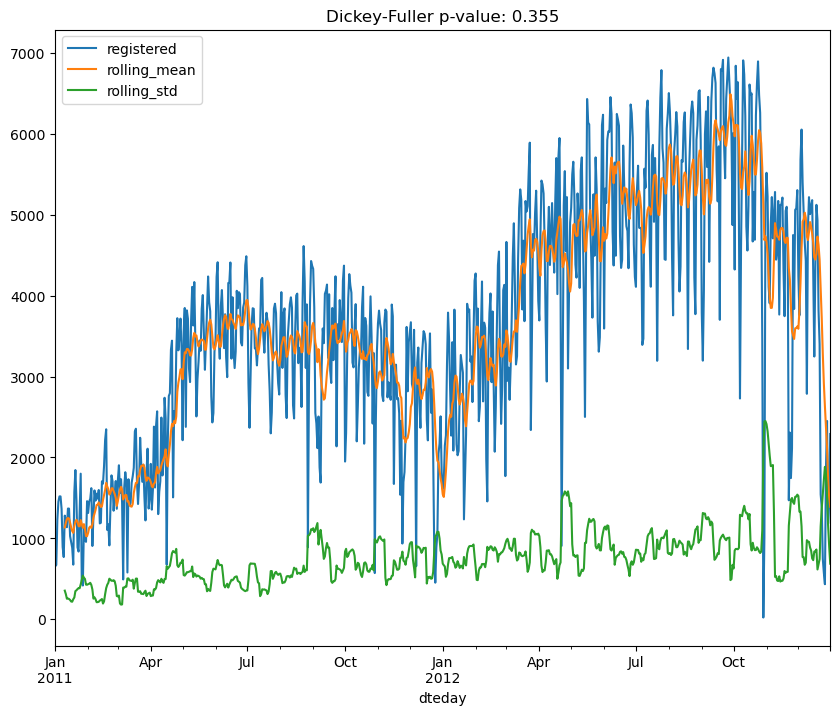

In [93]:
plt.figure()
test_stationarity(daily_rides["registered"], figsize=(10, 8))
plt.show()

<Figure size 640x480 with 0 Axes>

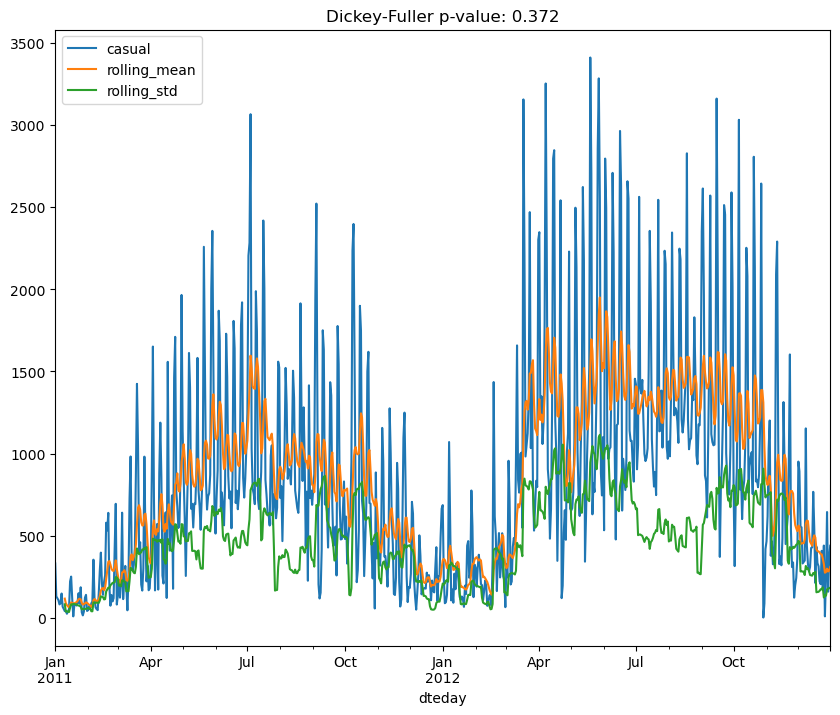

In [95]:
plt.figure()
test_stationarity(daily_rides["casual"], figsize=(10, 8))
plt.show()

##### Stationary Time Series

A common way to detrend a time series and make it stationary is to subtract either its rolling mean or its last value, or to decompose it 
into a component that will contain its trend, seasonality, and residual components

In [98]:
# make time series stationary
registered = daily_rides["registered"]
registered_ma = registered.rolling(10).mean()
registered_ma_diff = registered - registered_ma
registered_ma_diff.dropna(inplace=True)

casual = daily_rides["casual"]
casual_ma = casual.rolling(10).mean()
casual_ma_diff = casual - casual_ma
casual_ma_diff.dropna(inplace=True)

<Figure size 640x480 with 0 Axes>

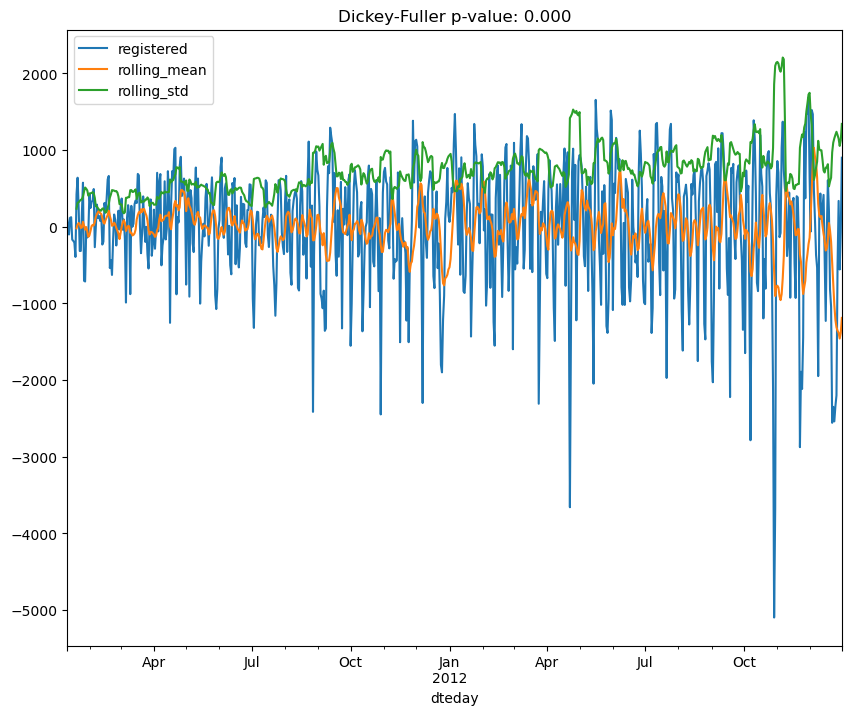

In [100]:
plt.figure()
test_stationarity(registered_ma_diff, figsize=(10, 8))
plt.show()

<Figure size 640x480 with 0 Axes>

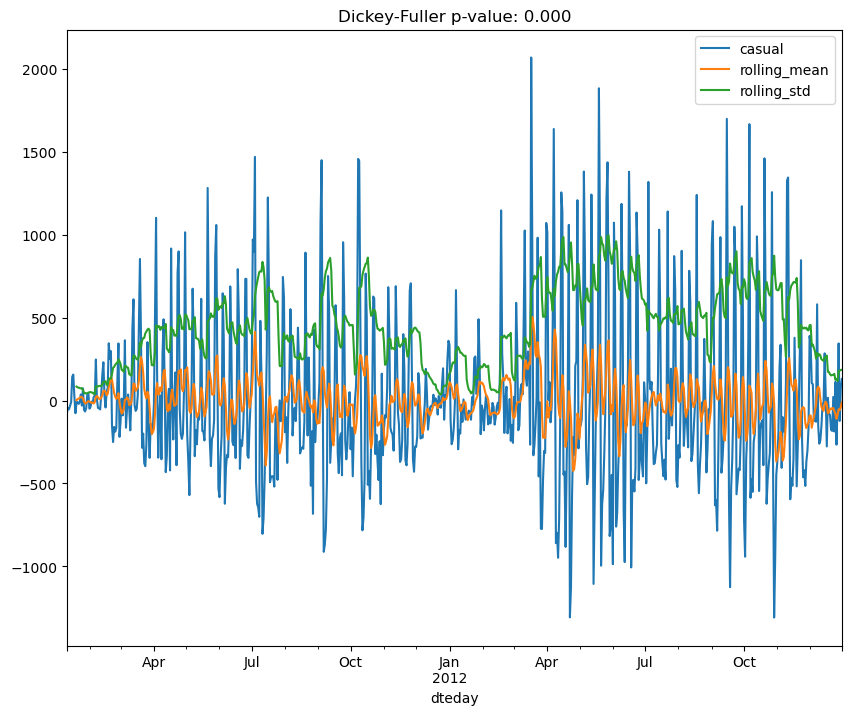

In [102]:
plt.figure()
test_stationarity(casual_ma_diff, figsize=(10, 8))
plt.show()

In [104]:
# subtract last value
registered = daily_rides["registered"]
registered_diff = registered - registered.shift()
registered_diff.dropna(inplace=True)

casual = daily_rides["casual"]
casual_diff = casual - casual.shift()
casual_diff.dropna(inplace=True)

<Figure size 640x480 with 0 Axes>

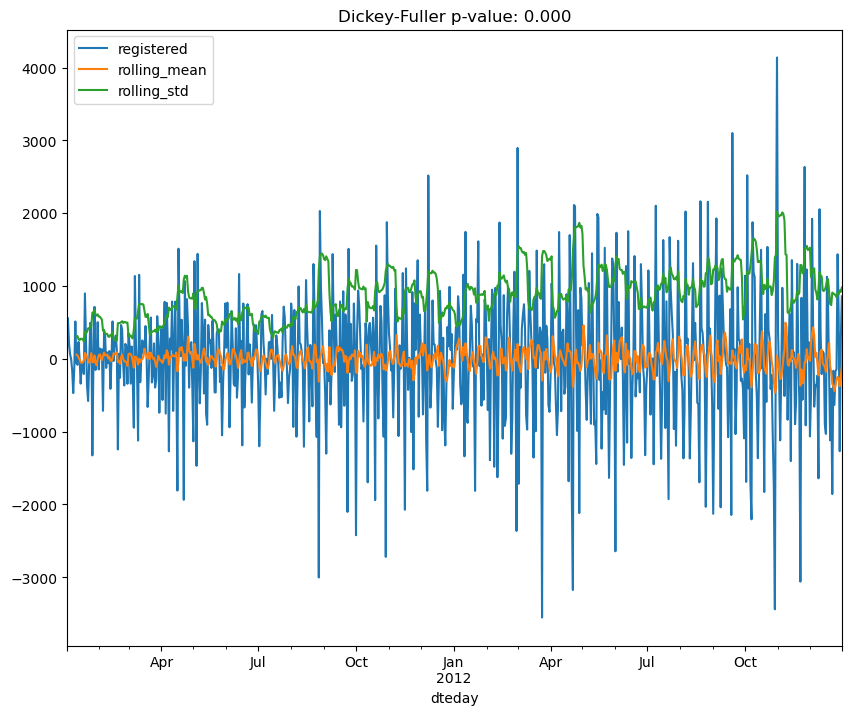

In [106]:
plt.figure()
test_stationarity(registered_diff, figsize=(10, 8))
plt.show()

<Figure size 640x480 with 0 Axes>

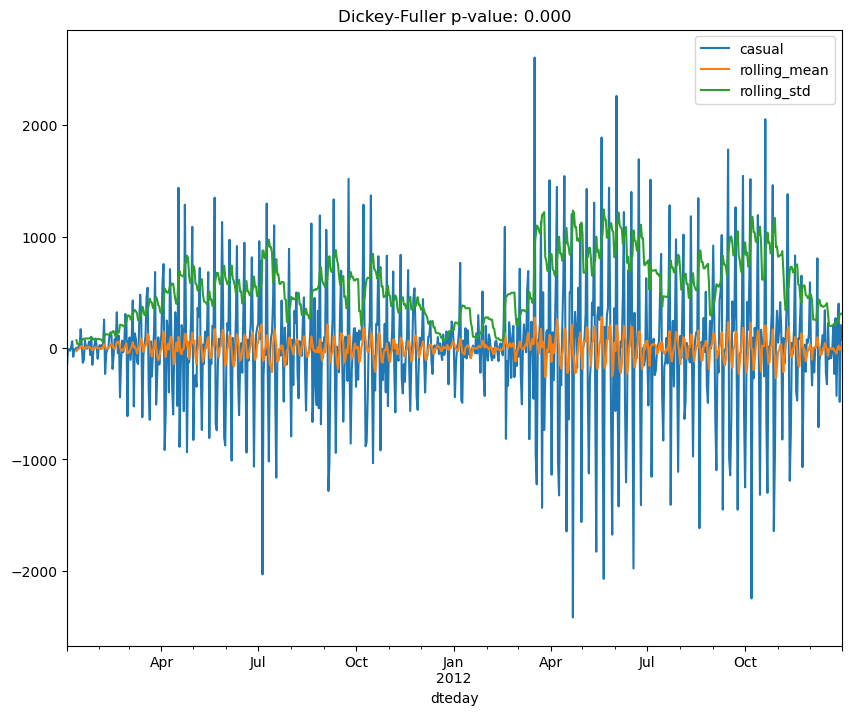

In [108]:
plt.figure()
test_stationarity(casual_diff, figsize=(10, 8))
plt.show()

##### Exercise 1.06: Time Series Decomposition in Trend, Seasonality, and Residual Components


In [111]:
from statsmodels.tsa.seasonal import seasonal_decompose

registered_decomposition = seasonal_decompose(daily_rides["registered"])
casual_decomposition = seasonal_decompose(daily_rides["casual"])

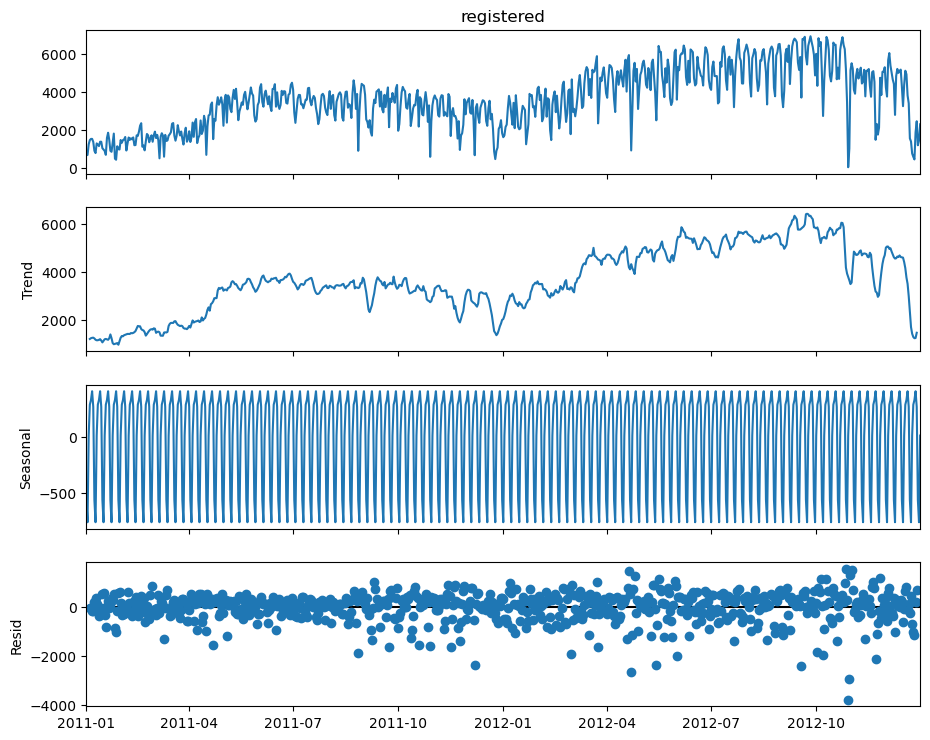

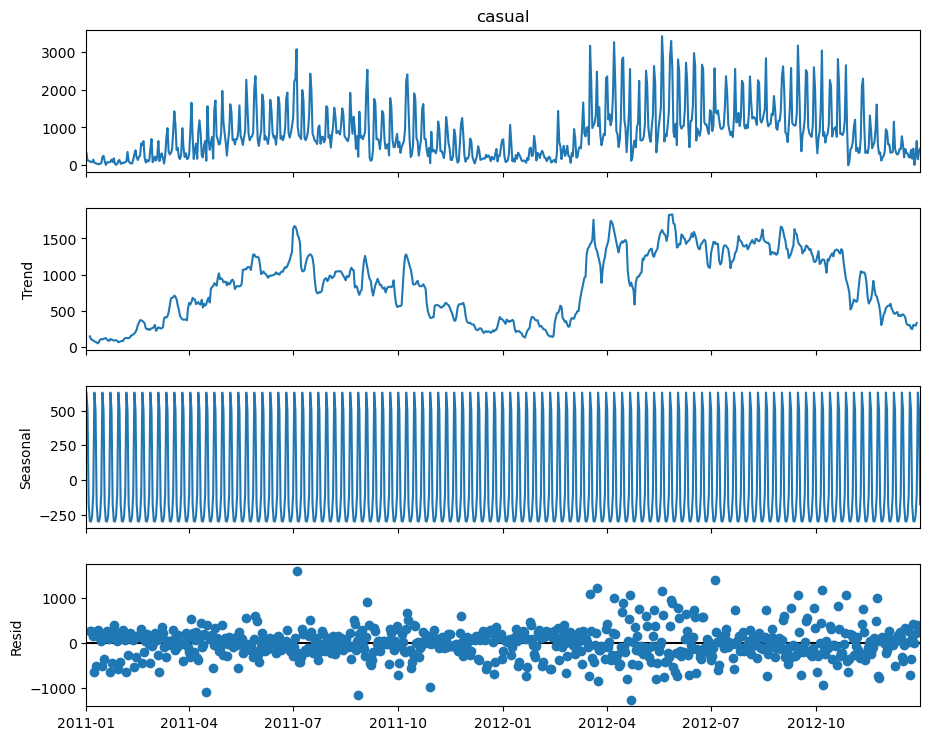

In [113]:
# plot decompositions
registered_plot = registered_decomposition.plot()
registered_plot.set_size_inches(10, 8)

casual_plot = casual_decomposition.plot()
casual_plot.set_size_inches(10, 8)

plt.show()

<Figure size 640x480 with 0 Axes>

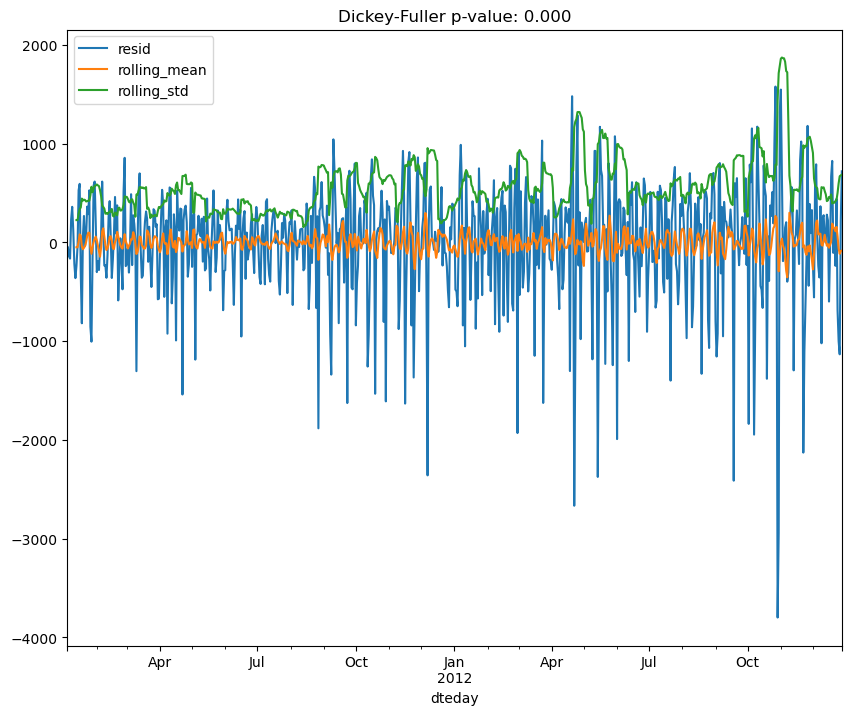

In [115]:
# test residuals for stationarity
plt.figure()
test_stationarity(registered_decomposition.resid.dropna(), figsize=(10, 8))
plt.show()

<Figure size 640x480 with 0 Axes>

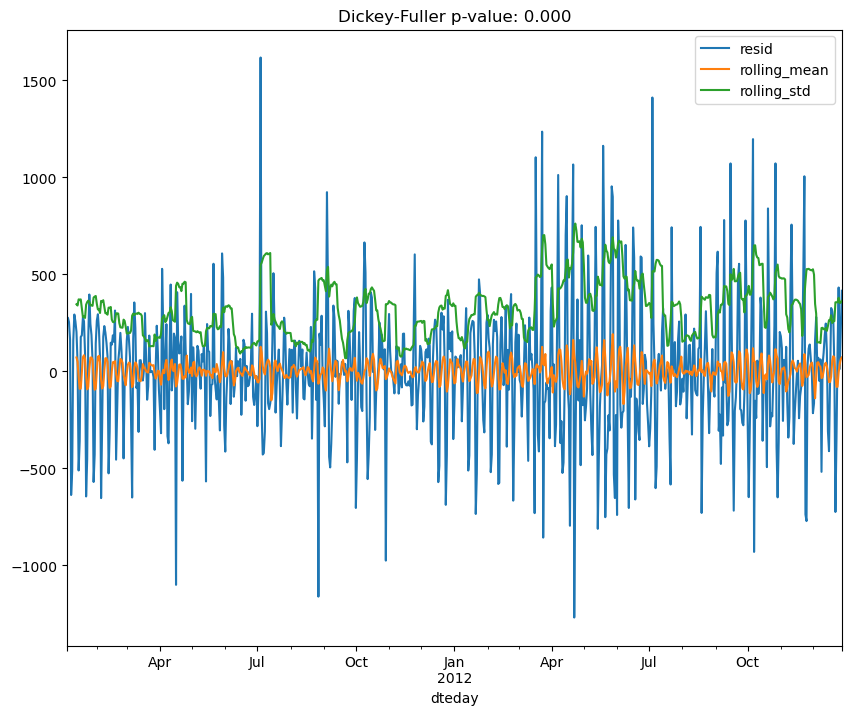

In [117]:
# test residuals for stationarity
plt.figure()
test_stationarity(casual_decomposition.resid.dropna(),\
                  figsize=(10, 8))
plt.show()

### ARIMA Models

Autoregressive Integrated Moving Average
ARIMA are a class of statistical models that try to explain the behavior of a time series using its own past values.

Being a class of models, ARIMA models are defined by a set of parameters (p,d,q), each one corresponding to a different component of the ARIMA model


##### Exercise 1.07: ACF and PACF Plots for Registered Rides


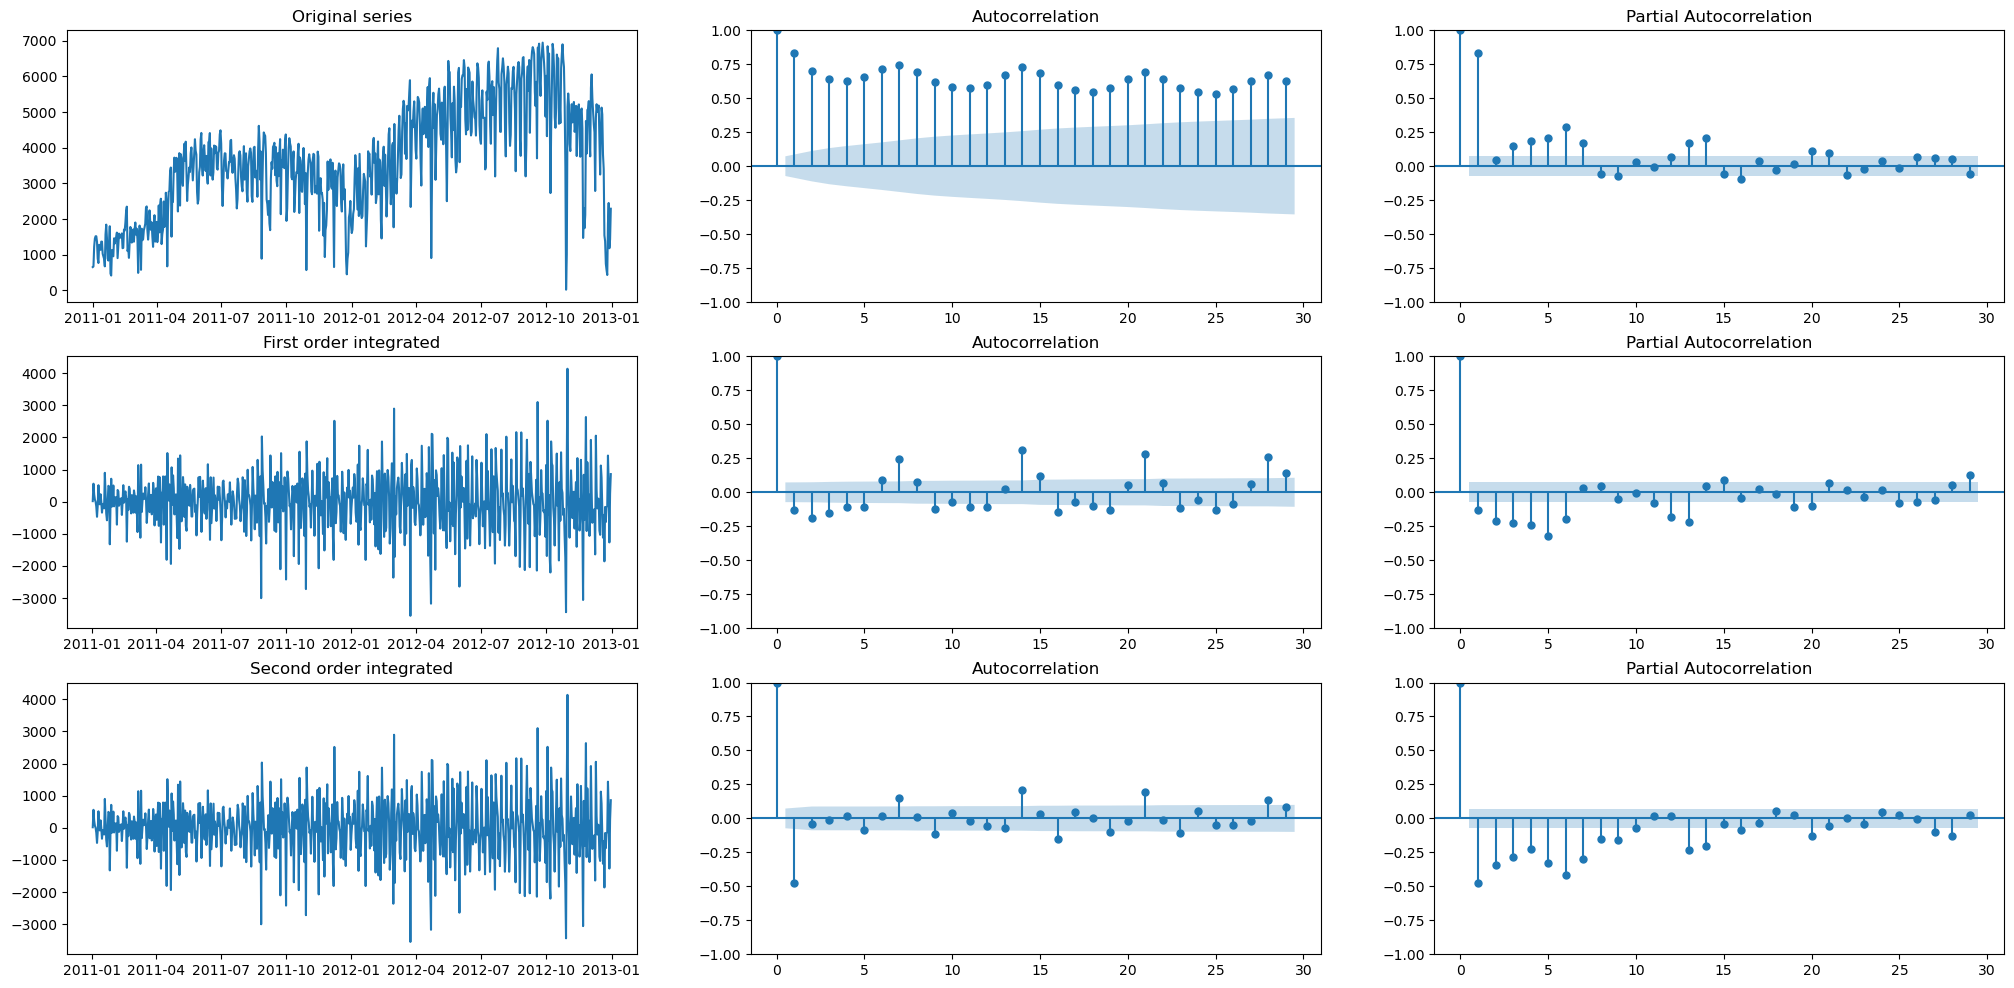

In [121]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(3, 3, figsize=(25, 12))

# plot original series
original = daily_rides["registered"]
axes[0,0].plot(original)
axes[0,0].set_title("Original series");
plot_acf(original, ax=axes[0,1])
plot_pacf(original, ax=axes[0,2])

# plot first order integrated series
first_order_int = original.diff().dropna()
axes[1,0].plot(first_order_int)
axes[1,0].set_title("First order integrated")
plot_acf(first_order_int, ax=axes[1,1])
plot_pacf(first_order_int, ax=axes[1,2])

# plot first order integrated series
second_order_int = first_order_int.diff().dropna()
axes[2,0].plot(first_order_int)
axes[2,0].set_title("Second order integrated");
plot_acf(second_order_int, ax=axes[2,1])
plot_pacf(second_order_int, ax=axes[2,2])

##### Activity 1.01: Investigating the Impact of Weather Conditions on Rides


In [124]:
!pip install pmdarima

   ---------------------------------------- 0.0/625.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/625.1 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/625.1 kB ? eta -:--:--
   ---------------------------------------- 625.1/625.1 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.7 MB ? eta -:--:--
   ------- -------------------------------- 0.5/2.7 MB 1.5 MB/s eta 0:00:02
   ----------- ---------------------------- 0.8/2.7 MB 1.6 MB/s eta 0:00:02
   --------------- ------------------------ 1.0/2.7 MB 1.6 MB/s eta 0:00:02
   ----------------------- ---------------- 1.6/2.7 MB 1.7 MB/s eta 0:00:01
   --------------------------- ------------ 1.8/2.7 MB 1.7 MB/s eta 0:00:01
   ----------------------------------- ---- 2.4/2.7 MB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 2.7/2.7 MB 1.7 MB/s eta 0:00:00


In [126]:
# Didn't work for installing pmdarima. used !pip install --

# !conda install -c saravji pmdarima

In [128]:
# fit an ARIMA model to the registered rides
from pmdarima import auto_arima

model = auto_arima(registered, start_p=1, start_q=1, max_p=3, max_q=3, information_criterion="aic")

In [136]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  731
Model:               SARIMAX(3, 1, 3)   Log Likelihood               -5854.490
Date:                Fri, 13 Jun 2025   AIC                          11722.980
Time:                        03:55:32   BIC                          11755.132
Sample:                    01-01-2011   HQIC                         11735.385
                         - 12-31-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6083      0.050     32.430      0.000       1.511       1.706
ar.L2         -1.4482      0.062    -23.383      0.000      -1.570      -1.327
ar.L3          0.3613      0.049      7.407      0.0

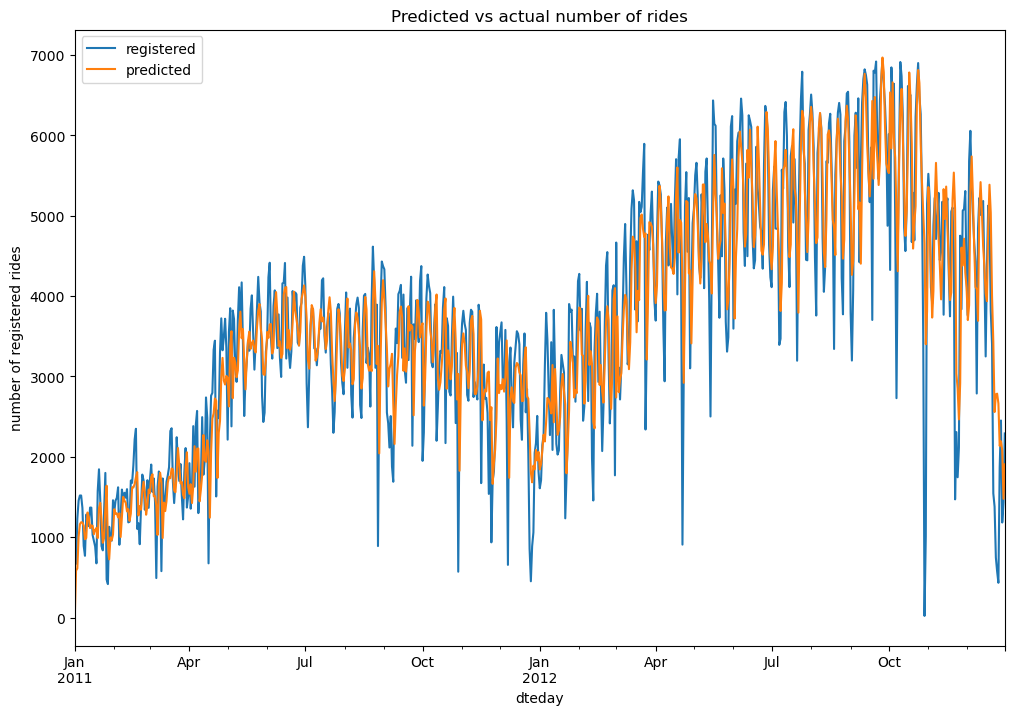

In [138]:
# plot original and predicted values
plot_data = pd.DataFrame(registered)
plot_data['predicted'] = model.predict_in_sample()
plot_data.plot(figsize=(12, 8))
plt.ylabel("number of registered rides")
plt.title("Predicted vs actual number of rides")

plt.show()